In [ ]:
from tldraw import TldrawWidget
t = TldrawWidget(width=1502, height = 700)

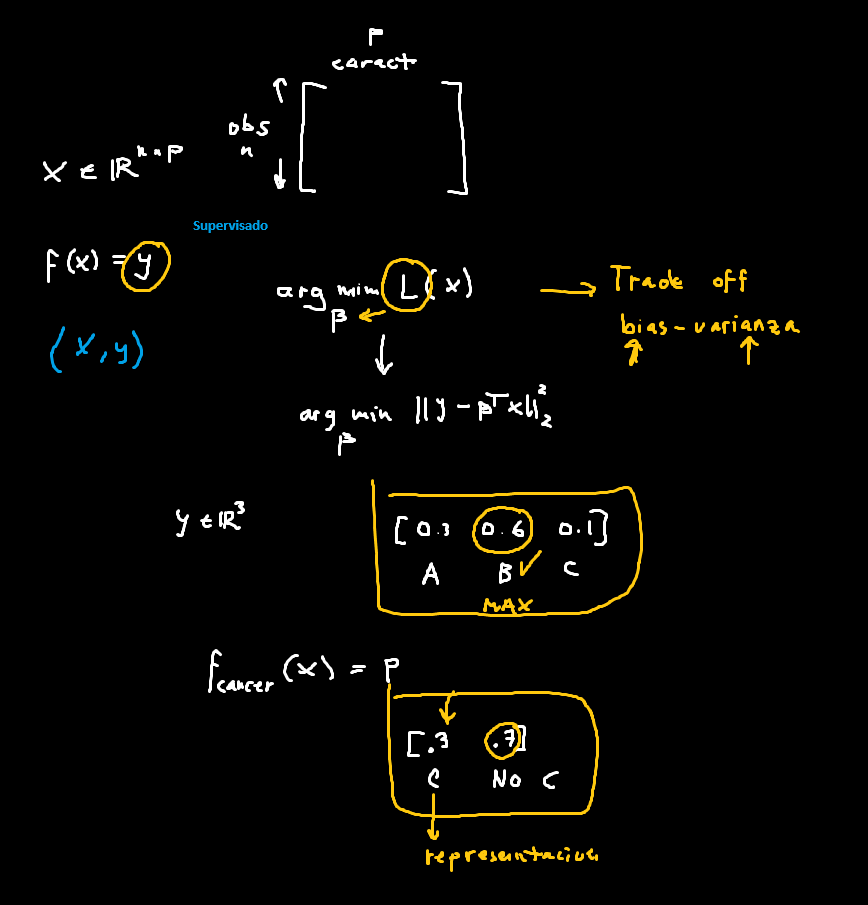

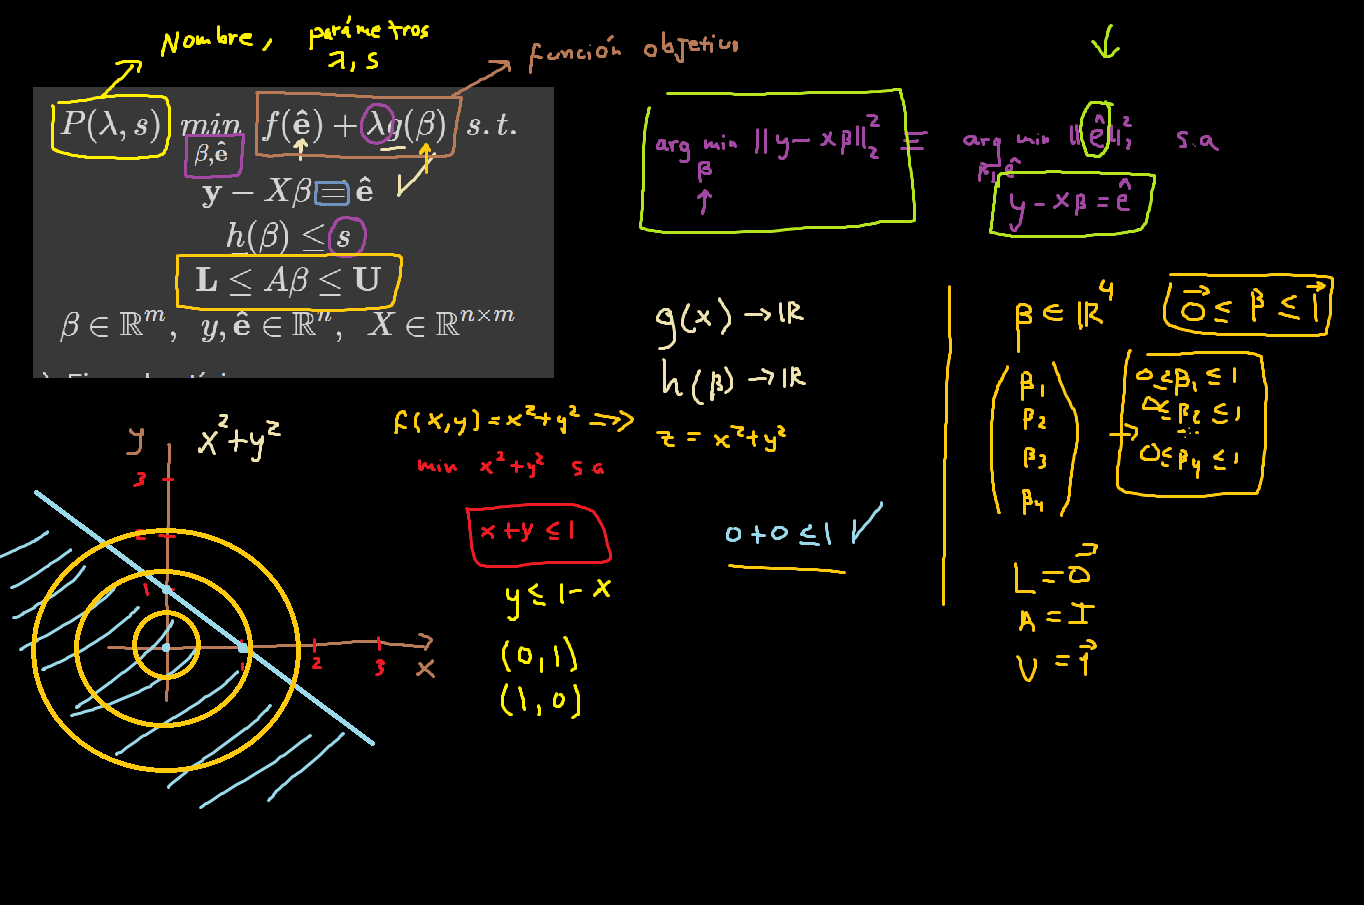

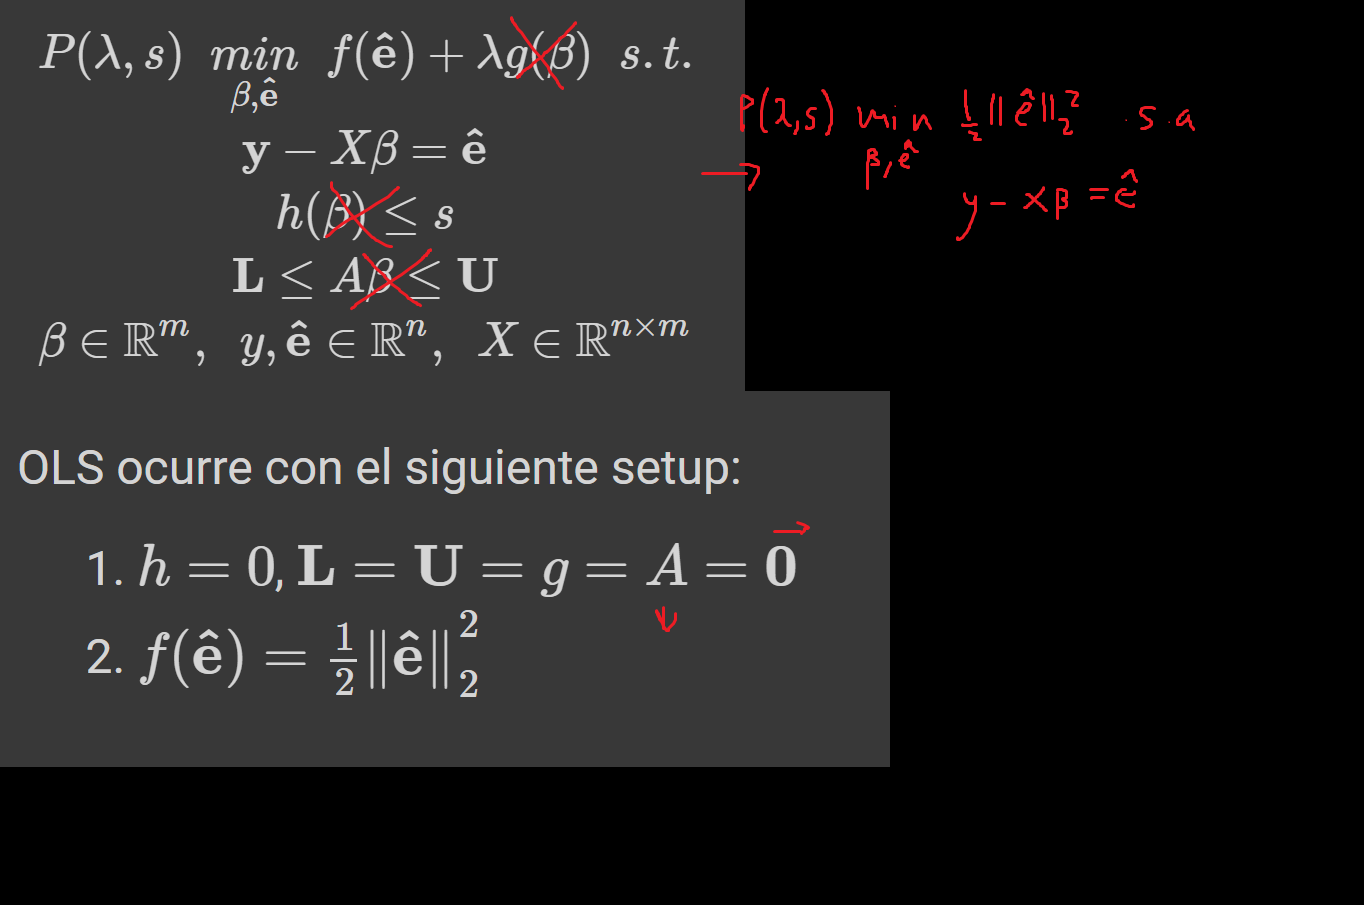

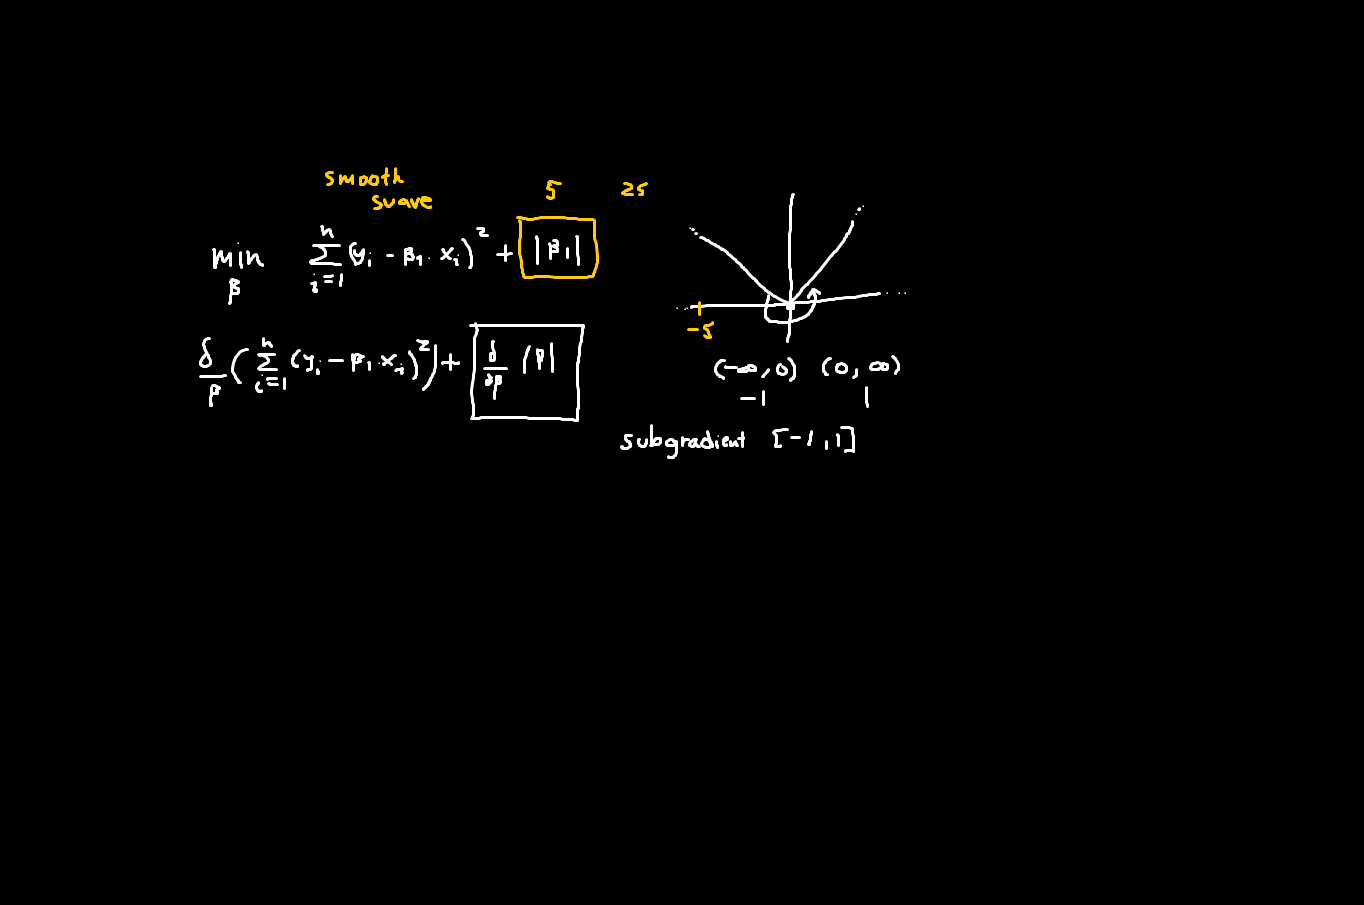

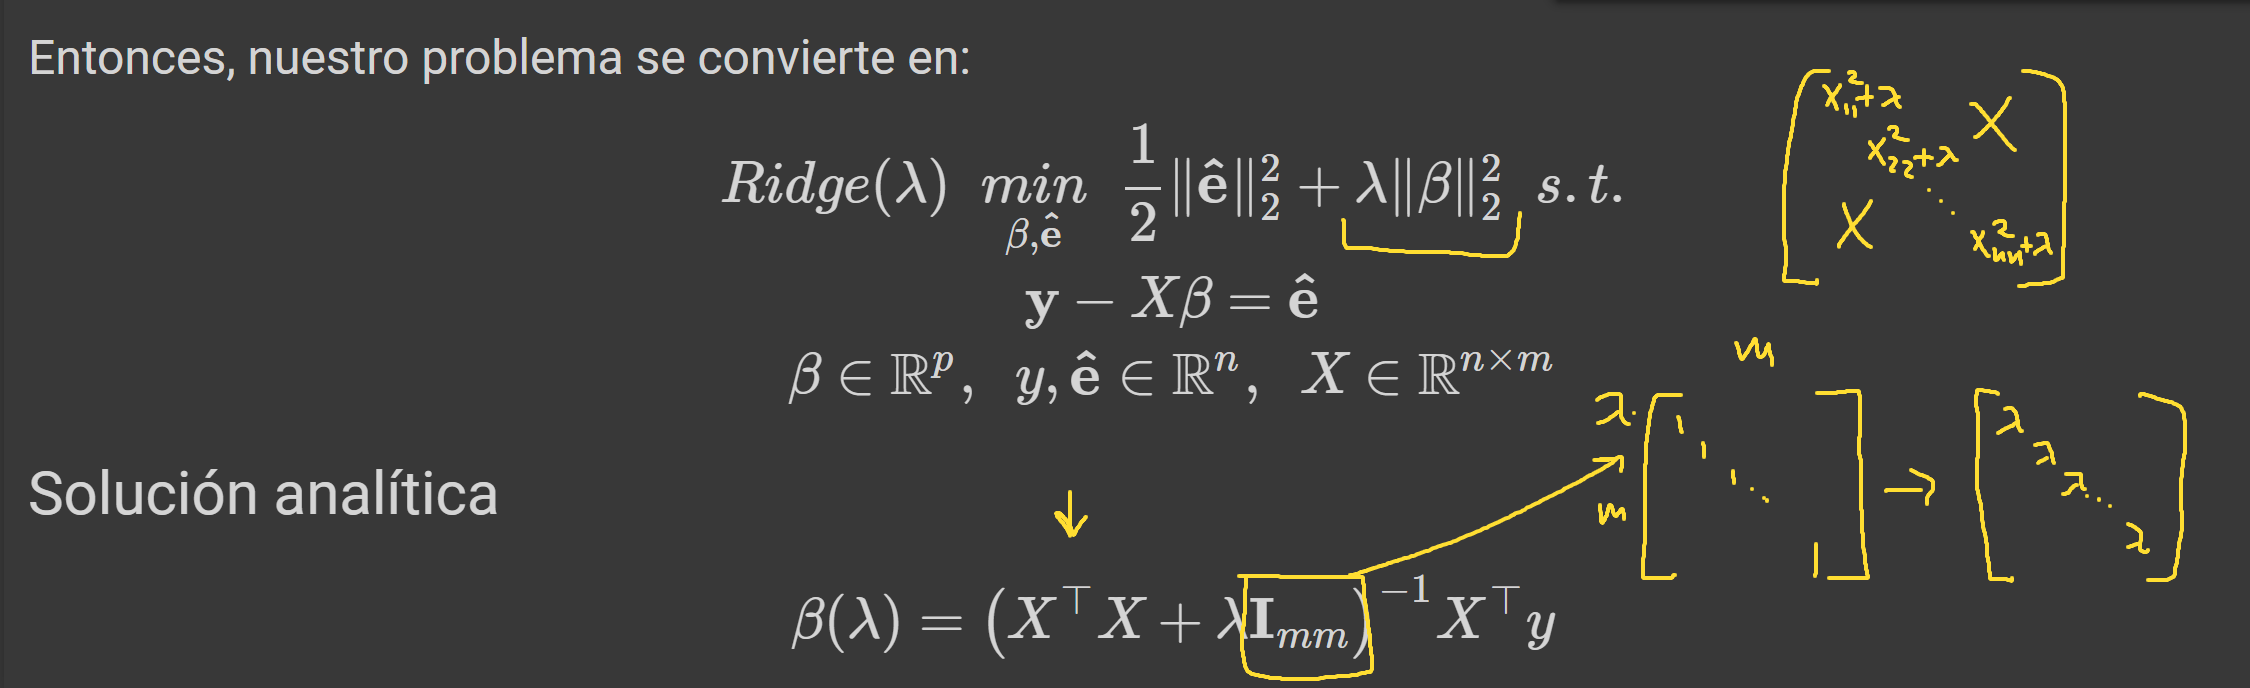

In [ ]:
!pip install tldraw

# Introducción a métodos de regularización en Aprendizaje Automático

## Versión b.1

El notebook lo puedo modificar, esta versión es la b.1 a 05/06/2024 a las 17:13 Caracas.

## Aprendizaje Automático [UCV]


* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

## Plot de curva

In [ ]:
#@ plot_curve(f, _params=[], _range=(-5, 5), _points=100)

import matplotlib.pyplot as plt

def plot_curve(f, _params=[], _range=(-5, 5), _points=100):
  """
  Método para graficar una curva f(x) cuyos parámetros fijos son _params en el rango _range(min, max) usando subsampling de _points

  :param f: La función a graficar
  :param _params: Los parámetros fijos de la función
  :param _range: El rango de X (min, max)
  :param _points: Número de puntos donde vamos a subsamplear a f

  :returns: Nada
  """
  X = np.linspace(_range[0], _range[1], _points)
  plt.plot(X, np.array(list(map(lambda x: f(x, *_params), X))))

In [ ]:
import numpy as np

In [ ]:
f = lambda x, L, k, x0: L/(1.0 + np.exp(-1.0*k*(x-x0)))

In [ ]:
f = lambda x: x**2

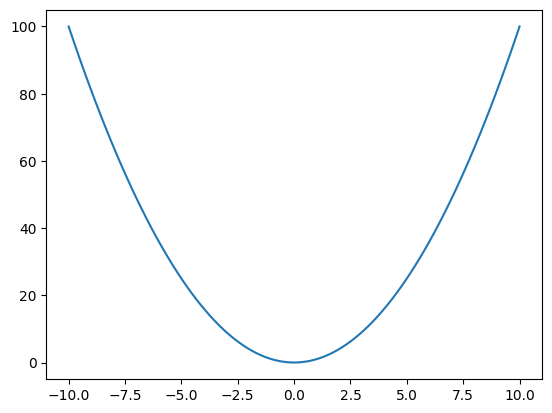

In [ ]:
plot_curve(f, _range=(-10, 10))

# Resumen

consideremos el problema de Regresión lineal : $$y = \mathbf{X} \beta_* + \epsilon \text{ with }$$

1. $\mathbf{X} \in \mathbb{R}^{n,m}$ *a* nuestra **matriz de datos**.
1. $\epsilon \in \mathbb{R}$ el ruido aleatorio definido como una variable aleatoria Normal con media $0$ y varianza $\sigma^2$, esto es, $\epsilon \sim \mathcal{N}(\mu=0,\,\sigma^{2})$
1. $y \in \mathbb{R}^n$ es nuestro vector a predecir que llamamos comunmente **vector respuesta** y del cual asumimos una relación lineal con $\mathbf{X}$.
1. $\beta_* \in \mathbb{R}^m$ es el modelo óptimo.

Supongamos que tenemos una **muestra aleatoria** de ($X, \mathbf{y}$) de tamaño $n$ para ambas $\mathbf{X}$ y $y$ entonces $X \in \mathbb{R}^{n \times m}$ y $\mathbf{y} \in \mathbb{R}^n$. El obketivo principal es conseguir $\beta_*$.  

## Definición: error $\hat{e}$

Consideremos $\beta$ un estimador de $\beta_*$. Definimos el vector de error, $\hat{e}$, como: $$ \hat{e} = \mathbf{y} - X \beta $$

## **Definición:** Un problema general de optimización $P(\lambda, s)$

Definamos nuestro problema $P(\lambda, s)$ como:

$$P(\lambda,s)\;\;\underset{\beta,\mathbf{\hat{e}}}{min}\;\;f(\mathbf{\hat{e}}) + \lambda g(\beta)\;\;s.t.$$
$$\mathbf{y} - X \beta = \mathbf{\hat{e}}$$
$$h(\beta) \leq s$$
$$\mathbf{L} \leq A\beta \leq \mathbf{U}$$
$$\beta \in \mathbb{R}^m,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times m}$$

1. $f$ es la función de pérdida (_loss function_). Ejemplos típicos:
  * $f(\mathbf{\hat{e}}) = {\| \mathbf{\hat{e}} \|}_1$
  * $f(\mathbf{\hat{e}}) =\frac{1}{2} {\| \mathbf{\hat{e}} \|}^2_2$
  * Entre otros.
1. $h$ y $g$ las denominaremos funciones de **complejidad** del modelo $\beta$.  Ejemplos típicos:
    - $g(\mathbf{\beta}) = {\| \mathbf{\beta} \|}_1$ and $g(\mathbf{\beta}) = {\| \mathbf{\beta} \|}^2_2$
    - $h(\mathbf{\beta}) = {\| \mathbf{\beta} \|}_1$ and $h(\beta) = {\| \beta \|}_0 = \vert \lbrace j: \beta_j \neq 0, j \in [n] \rbrace \vert$
    - Entre otras.
1. Algunos elementos pueden **desaparecer** dependiendo de la formulación que necesitemos.

### Motivo

Normalmente intentamos minimizar el valor de una función de error, que denotaremos como $f$, para ser evaluada en $\hat{e}$ para encontrar buenos estimadores de $\beta_*$. Para lograr esto, agregamos una función de complejidad, que denotaremos como $g$ y $h$, que "controlará" el estimador $\hat{\beta}$ para ayudarnos a combatir el problema comúnmente conocido llamado sobreajuste. Hay varias formas de describir este problema.

- Desde el punto de vista estadístico, la función de complejidad básicamente añade sesgo a nuestros estimadores con la ventaja de reducir su varianza. Esto significa que se encuentran mejores estimadores para que podamos **generalizar** mejor para datos desconocidos.
- Desde un punto de vista no estadístico, la función de complejidad puede simplificar los estimadores (en el sentido de utilizar pocos regresores distintos de cero y/o con valores moderados) que nos permitan tener modelos fácilmente comprensibles.

Este proceso se conoce comúnmente como **regularización**

## Regresión lineal (OLS)

OLS ocurre con el siguiente setup:

1. $h = 0$, $\mathbf{L}=\mathbf{U}=g=A=\mathbf{0}$
1. $f(\mathbf{\hat{e}}) = {\frac{1}{2}\| \mathbf{\hat{e}} \|}^2_2$



### Formulación de regresión lineal:

En consecuencia, el problema a resolver es:

$$OLS\;\;\underset{\beta,\mathbf{\hat{e}}}{min}\;\;\frac{1}{2}\|\mathbf{\hat{e}}\|_2^2\;\;s.t.$$
$$\mathbf{y} - X \beta = \mathbf{\hat{e}}$$
$$\beta \in \mathbb{R}^m,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times m}$$

### Solución analítica (Ecuaciones normales)

$$ X^T X \beta = X^T y \Rightarrow \beta = (X^T X)^{-1}X^T y $$

## LASSO

Vamos a poner especial énfasis en el problema denominado LASSO [1].

Dado nuestro formato de formulación de problemas, Laso puede ser escrito como:

### Forma lagrangeana:

1. $h = 0$, $\mathbf{L}=\mathbf{U}=\mathbf{0}$
1. $A = \mathbf{0}$, $f(\mathbf{\hat{e}}) = {\frac{1}{2}\| \mathbf{\hat{e}} \|}^2_2$
1. $g(\mathbf{\beta}) = \lambda {\| \mathbf{\beta} \|}_1$.

Entonces, nuestro problema se convierte en:

$$Lasso(\lambda)\;\;\underset{\beta,\mathbf{\hat{e}}}{min}\;\; \frac{1}{2}\|\mathbf{\hat{e}}\|_2^2 + \lambda \|\beta\|_1\;\;s.t.$$
$$\mathbf{y} - X \beta = \mathbf{\hat{e}}$$
$$\beta \in \mathbb{R}^m,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times m}$$


Colocar biblliografía Hastie, Tibshirani Stanford

### Forma con restricciones:

1. $g = 0$, $\mathbf{L}=\mathbf{U}=\mathbf{0}$
1. $A = \mathbf{0}$, $f(\mathbf{\hat{e}}) = {\frac{1}{2}\| \mathbf{\hat{e}} \|}^2_2$
1. $h(\mathbf{\beta}) = {\| \mathbf{\beta} \|}_1$.

$$Lasso(s)\;\;\underset{\beta,\mathbf{\hat{e}}}{min}\;\;\frac{1}{2}\|\mathbf{\hat{e}}\|_2^2\;\;s.t.$$
$$\mathbf{y} - X \beta = \mathbf{\hat{e}}$$
$${\| \mathbf{\beta} \|}_1 \leq s$$
$$\beta \in \mathbb{R}^m,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times m}$$



La regresión Lasso es un método de **contracción** (_shrinkage_). Lasso impone una **penalidad** $\ell_1$ en los parámetros $\beta$.

Lasso consigue el modelo óptimo para $\beta$ que minimiza la función

$$f(\beta) = \|y - X\beta \|_2^2 + \lambda \|\beta\|_1,$$

La penalización $\ell_1$ implica **sparsidad** "dispersidad" en los parámetros del modelo, y, como veremos, puede llevar muchos coeficientes al **cero teórico**. En este sentido, lasso es un método de **selección de parámetros**.

### Closed form solution

Si $X^{T} X=I,$ tenemos solución analítica: $\widehat{\beta}=S_{\lambda}\left(X^{T} y\right)$

Where $S_{\kappa}(a)=\left\{\begin{array}{ll}a-\kappa & a>\kappa \\ 0 & |a| \leq \kappa \\ a+\kappa & a<-\kappa\end{array}\right.$

Que es el famoso operador Soft-Thresholding.

## Ridge regression

También para este caso, tenemos dos posibles formulaciones. Para no extendernos más allá de una introducción, lo escribiremos en formulación lagrangeana.


### **Ridge**: Formulación lagrangeana

1. $h = 0$, $\mathbf{L}=\mathbf{U}=\mathbf{0}$
1. $A = \mathbf{0}$, $f(\mathbf{\hat{e}}) = {\frac{1}{2}\| \mathbf{\hat{e}} \|}^2_2$
1. $g(\mathbf{\beta}) = \lambda {\| \mathbf{\beta} \|}_2^2$.

Entonces, nuestro problema se convierte en:

$$Ridge(\lambda)\;\;\underset{\beta,\mathbf{\hat{e}}}{min}\;\; \frac{1}{2}\|\mathbf{\hat{e}}\|_2^2 + \lambda \|\beta\|_2^2\;\;s.t.$$
$$\mathbf{y} - X \beta = \mathbf{\hat{e}}$$
$$\beta \in \mathbb{R}^p,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times m}$$

### Solución analítica

$$\beta(\lambda)=\left(X^{\top} X+\lambda \mathbf{I}_{mm}\right)^{-1} X^{\top} y$$

# Laboratorio

In [ ]:
!pip install cvxpy

In [ ]:
from cvxpy import Variable, Problem, Minimize, Parameter
from cvxpy import sum_squares, norm2, matmul, norm1
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

## Generación de los datos

Genere `generate_data` para crear una tupla X, y, w cuando el número de observaciones sea `n`, el número de características sea `m` y la proporción de coeficientes cero sea igual al `density`%. Por último, investigue la manera de _settear_  el valor de la semilla `seed`.

In [ ]:
def generate_data(n=20, m=5, sigma=0.3, density=0.2, seed=123456):
    "Generates data matrix X and observations Y."
    np.random.seed(seed)

    # Generación del modelo
    beta_star = sigma*np.random.randn(m)

    # Seleccionar los indices de sparcidad
    idxs = np.random.choice(range(m), int((1-density)*m), replace=False)

    # Setteando los valores exactamente a 0
    for idx in idxs:
        beta_star[idx] = 0

    # Creando la matriz del modelo N(0, sigma=1)
    X = np.random.randn(n, m)

    # Agregando ruido ~ N(0, sigma)
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=n)

    return X, Y.reshape(n, 1), beta_star.reshape(m, 1)

### Tarea

Utilice `generate_data` para crear la tupla X, y, w cuando el número de observaciones sea 30, el número de características sea 100 y la proporción de coeficientes cero sea igual al 90%.

In [ ]:
_, _, _ = generate_data(n='', p='', density='')

TypeError: ignored

### Solution

In [ ]:
# 1224434
X, y, w = generate_data(n=30, m=100, sigma=3, density=0.1, seed=1232300)

TAREA: Cuántos problemas tienen más observaciones que entradas? Cómo se llaman este tipo de problemas?

In [ ]:
X

array([[-0.63350035,  0.26295392,  0.76263251, ..., -0.64598602,
         0.6759692 ,  0.76589716],
       [-0.29670185, -1.24317874, -1.44805221, ..., -2.01568082,
         2.55138722, -1.38875027],
       [-1.38620007,  0.84080938, -1.24277066, ..., -0.71374822,
        -0.76373485, -0.19371327],
       ...,
       [ 0.96610246,  0.33565394, -0.00787418, ...,  0.75958059,
        -0.07645028,  1.21636902],
       [ 0.16995524, -0.94485736,  3.01347295, ..., -1.15095968,
        -0.57994119, -0.97079591],
       [ 1.19477043, -1.08379873, -0.5747683 , ...,  2.12015979,
        -0.37308524, -0.09980036]])

In [ ]:
X.shape

(30, 100)

In [ ]:
y.shape

(30, 1)

In [ ]:
w

array([[ 0.        ],
       [ 0.        ],
       [-2.12078223],
       [ 0.        ],
       [ 4.8878188 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-4.11227443],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.8450862 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

In [ ]:
n, m = 50, 100

In [ ]:
X, y, w = make_regression(n_samples=n, n_features=m, n_informative=10, noise=1, random_state=1232300, coef=True)

In [ ]:
y = y.reshape(n, 1)

## Generación del modelo

Usaremos el famoso paquete [CVXPY](https://www.cvxpy.org/) de la Universidad de Stanford porque nos permite expresar su problema de una manera natural que sigue las matemáticas, en lugar de la forma estándar restrictiva requerida por paquetes denominados _solvers_ (Gurobi, CPLEX, etcétera).

Para obtener más información, visite la página web principal [CVX](http://cvxr.com/cvx/) donde explicaron más sobre la programación convexa disciplinada.

### Ordinary Least Squares

In [ ]:
(n, m), solver = X.shape, None

X_ols = Parameter(shape=X.shape, name="X")
y_ols = Parameter(shape=y.shape, name="y")
w_ols = Variable(shape=(m, 1), name="w_ols")

X_ols.value, y_ols.value = X, y

ols = Problem(
    Minimize
    (
        sum_squares(y_ols - X_ols@w_ols)
    )
)

if solver is not None:
    ols.solve(solver=solver)
else:
    ols.solve()

coef_ols = w_ols.value

In [ ]:
w

In [ ]:
coef_ols

### **Lasso:** Formulación con restricciones

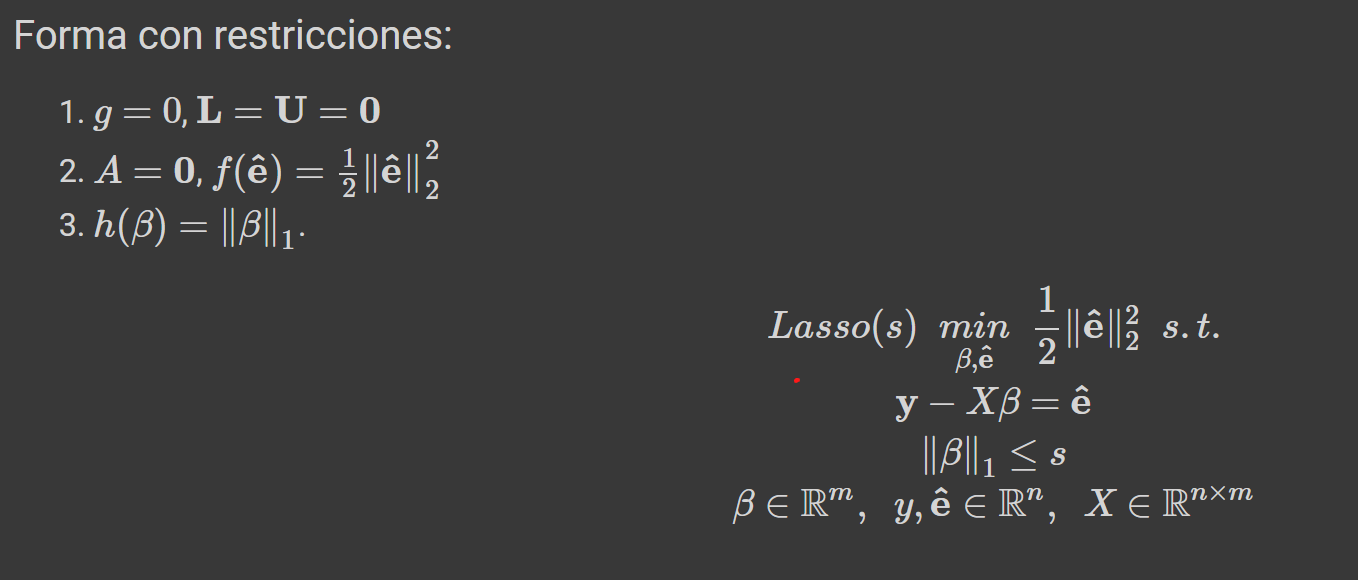

In [ ]:
(n, m), solver, s = X.shape, None, 13.30309405261565

X_lasso = Parameter(shape=X.shape, name="X")
y_lasso = Parameter(shape=y.shape, name="y")
s_lasso = Parameter(nonneg=True, name="s")
w_lasso = Variable(shape=(m, 1), name="w_lasso")

X_lasso.value, y_lasso.value, s_lasso.value = X, y, s

Lasso = Problem(
    Minimize(
        norm2(y_lasso - X_lasso@w_lasso)**2
    ),
    [norm1(w_lasso) <= s_lasso]
)

if solver is not None:
    Lasso.solve(solver=solver)
else:
    Lasso.solve()

coef_lasso = w_lasso.value

In [ ]:
for lasso, opt in zip(coef_lasso, w):
  print("lasso: {} opt: {}".format(lasso, opt))

lasso: [-0.] opt: [0.]
lasso: [0.11283356] opt: [0.]
lasso: [-1.19240377] opt: [-2.12078223]
lasso: [-0.00000002] opt: [0.]
lasso: [3.19427519] opt: [4.8878188]
lasso: [-0.] opt: [0.]
lasso: [0.00000001] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [0.00000001] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [0.00000001] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-3.59080159] opt: [-4.11227443]
lasso: [-0.] opt: [0.]
lasso: [0.00000001] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [-0.00000001] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [0.00000001] opt: [0.]
lasso: [0.] opt: [0.]
lasso: [0.00000001] opt: [0.8450862]
lasso: [-0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [0.00000001] opt: [0.]
lasso: [-0.] opt: [0.]
lasso: [-0.00000002] opt: [0.]

### **Lasso:** Formulación lagrangeana

In [ ]:
(n, m), solver, Lambda = X.shape, None, 12.329764280592936

X_lasso_lag = Parameter(shape=X.shape, name="X")
y_lasso_lag = Parameter(shape=y.shape, name="y")
L_lasso_lag = Parameter(nonneg=True, name="Lambda")
w_lasso_lag = Variable(shape=(m, 1), name="w_ols")

X_lasso_lag.value, y_lasso_lag.value, L_lasso_lag.value = X, y, Lambda

Lasso_lag = Problem(
    Minimize(
        sum_squares(y_lasso_lag - X_lasso_lag@w_lasso_lag) + L_lasso_lag*norm1(w_lasso_lag)
    )
)

if solver is not None:
    Lasso_lag.solve(solver=solver)
else:
    Lasso_lag.solve()

coef_lasso_lag = w_lasso_lag.value

## Ver resultados básicos

In [ ]:
pd.set_option('display.float_format', str)

In [ ]:
from re import M
df = pd.DataFrame.from_dict(
    {
        "w": w.reshape(m),
        "OLS": coef_ols.reshape(m),
        "Constrained": coef_lasso.reshape(m),
        "Lagrangian": coef_lasso_lag.reshape(m)
    }
)

In [ ]:
df[np.abs(df.w)>0]

,w,OLS,Constrained,Lagrangian
2,-2.120782,-1.298915,-1.192404e+00,-2.352770e+00
4,4.887819,2.214128,3.194275e+00,3.689219e+00
21,-4.112274,-1.939734,-3.590802e+00,-3.160052e+00
31,0.845086,-0.381689,5.391194e-09,1.290389e-20
82,3.825350,1.398275,3.370503e+00,3.753718e+00
83,0.561928,1.037364,1.227250e-08,8.032137e-01
86,2.800613,0.786181,1.279780e-08,9.699106e-01
93,0.015746,0.200665,4.371577e-09,7.083847e-03
96,-3.632322,-1.741400,-1.751398e+00,-2.445004e+00
99,-3.065621,-2.183951,-1.700901e+00,-3.056797e+00


## Calculando el camino de regularización y los valores cuadráticos medios


Ahora, usemos solo la formulación lagrangiana de Lasso, terminemos el script a continuación para que podamos trazar el camino de regularización dadas las lambdas proporcionadas.

regularization path

### Métodos

#### Mean Squared Error (MSE)

In [ ]:
def mse(X, y, beta):
    """This function computes the mean squared value given a Model Matrix X, a response vector y and a model beta.
    Args:
        X (numpy.ndarray): [description]
        y (numpy.array): [description]
        beta (numpy.array): [description]
    Returns:
        float: The mean squared error
    """
    return (1.0 / X.shape[0]) * loss_fn(X, y, beta).value


#### Loss function

In [ ]:
def loss_fn(X, y, beta):
    """Calculates the value of the loss function
    Args:
        X (numpy.ndarray): [description]
        y (numpy.array): [description]
        beta (numpy.array): [description]
    Returns:
        float: The loss function evaluated at beta
    """
    return norm2(X @ beta - y)**2

### Sección de gráficos

Esta sección provee código para visualización de métodos comunes.

#### Regularization path

In [ ]:
def plot_regularization_path(lambd_values, beta_values, true_features, legend="\lambda", title="Regularization Path"):
    """Method to plot the regularization path given lambda values and beta values
    Args:
        lambd_values (numpy.ndarray): An array of lambda values
        beta_values (numpy.ndarray): A matrix of size (n, lambdas) with n the number of lambdas.
        legend (str): The x-axis label of interest (Defaults to lambda).
        title (str): The plot title name (Defaults to Regularization Path)
    """
    num_coeffs = len(beta_values[0])
    plt.figure(figsize=(10,10))
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values], linewidth=3 if i in true_features else 1)
    plt.xlabel(r"${}$".format(legend), fontsize=16)
    plt.xscale("log")
    plt.title("{}".format(title), fontsize=20)
    plt.show()

#### Mean Squared Error (MSE)

In [ ]:
def plot_mse(train_mse, test_mse, legend="\lambda", title="Mean Squared Value per iteration"):
    """Ploting the MSE per iteration
    Args:
        train__mse (numpy.ndarray): The array with the mse values related to the training set
        test__mse (numpy.ndarray): The array with the mse values related to the test set
        legend (str): The x-axis label of interest (Defaults to lambda).
        title (str): The plot title name (Mean Squared Value per iteration)
    """
    plt.figure(figsize=(10,10))
    plt.plot(range(len(train_mse)), train_mse)
    plt.plot(range(len(test_mse)), test_mse)
    plt.xlabel(r"${}$".format(legend), fontsize=16)
    plt.xscale("log")
    plt.title("{}".format(title), fontsize=20)
    plt.legend(['Train MSE', 'Test MSE'])
    plt.show()

## **Tarea**

Primero, dividamos los datos usando la forma más básica: 70% para el conjunto de entrenamiento y 30% para el conjunto de prueba. Posteriormente calcularemos el camino de regularización para ambas formulaciones.

Su tarea es rehacer la formulación para la forma restringida dada la solución de la forma lagrangiana.

Ya calculamos los conjuntos de datos X e y tanto para el entrenamiento como para las pruebas.

1. ¿Por qué los trazados de las rutas de regularización son diferentes?
1. ¿Por qué la MSE cambia dependiendo de los esquemas de train y test?
1. ¿Qué lambda deberíamos elegir? ¿Cómo ayudarnos a hacer esto?
1. Preste atención a las unidades de las lambdas, s. ¿Que estamos haciendo? ¿Por qué?


In [ ]:
(n_total, p_total), solver, Lambda, split = X.shape, None, 2.0, 0.3

k = int(n_total * (1 - split))

X_train, X_test, y_train, y_test  = X[:k, :], X[k:, :], y[:k], y[k:]

In [ ]:
X_train

array([[-0.63350035,  0.26295392,  0.76263251, ..., -0.64598602,
         0.6759692 ,  0.76589716],
       [-0.29670185, -1.24317874, -1.44805221, ..., -2.01568082,
         2.55138722, -1.38875027],
       [-1.38620007,  0.84080938, -1.24277066, ..., -0.71374822,
        -0.76373485, -0.19371327],
       ...,
       [-0.52409478,  1.85497963,  0.45653019, ..., -0.2768307 ,
         1.34434149, -0.24048937],
       [-0.43690786,  0.02388454, -1.13004838, ..., -1.01631585,
        -2.10078725, -0.53722419],
       [ 0.19356863,  0.34666492,  0.84401141, ..., -0.10603981,
        -0.28806073,  1.0953223 ]])

### Lasso con lagrangian formulation

In [ ]:
X_lasso_lag = Parameter(shape=X_train.shape, name="X")
y_lasso_lag = Parameter(shape=y_train.shape, name="y")
L_lasso_lag = Parameter(nonneg=True, name="Lambda")
w_lasso_lag = Variable(shape=(p_total, 1), name="w_ols")

X_lasso_lag.value, y_lasso_lag.value = X_train, y_train

Lasso_lag = Problem(
    Minimize(
        norm2(y_lasso_lag - X_lasso_lag@w_lasso_lag)**2 + L_lasso_lag*norm1(w_lasso_lag)
    )
)

In [ ]:
lambda_values = np.logspace(-1, 2, 50)
w_values, train_mse_values_lag, test_mse_values_lag = [], [], []

for l in lambda_values:
    L_lasso_lag.value = l
    Lasso_lag.solve()
    w_values.append(w_lasso_lag.value)
    train_mse_values_lag.append(mse(X=X_train, y=y_train, beta=w_lasso_lag.value))
    test_mse_values_lag.append(mse(X=X_test, y=y_test, beta=w_lasso_lag.value))

In [ ]:
np.log10(np.flip(lambda_values))

array([ 2.        ,  1.93877551,  1.87755102,  1.81632653,  1.75510204,
        1.69387755,  1.63265306,  1.57142857,  1.51020408,  1.44897959,
        1.3877551 ,  1.32653061,  1.26530612,  1.20408163,  1.14285714,
        1.08163265,  1.02040816,  0.95918367,  0.89795918,  0.83673469,
        0.7755102 ,  0.71428571,  0.65306122,  0.59183673,  0.53061224,
        0.46938776,  0.40816327,  0.34693878,  0.28571429,  0.2244898 ,
        0.16326531,  0.10204082,  0.04081633, -0.02040816, -0.08163265,
       -0.14285714, -0.20408163, -0.26530612, -0.32653061, -0.3877551 ,
       -0.44897959, -0.51020408, -0.57142857, -0.63265306, -0.69387755,
       -0.75510204, -0.81632653, -0.87755102, -0.93877551, -1.        ])

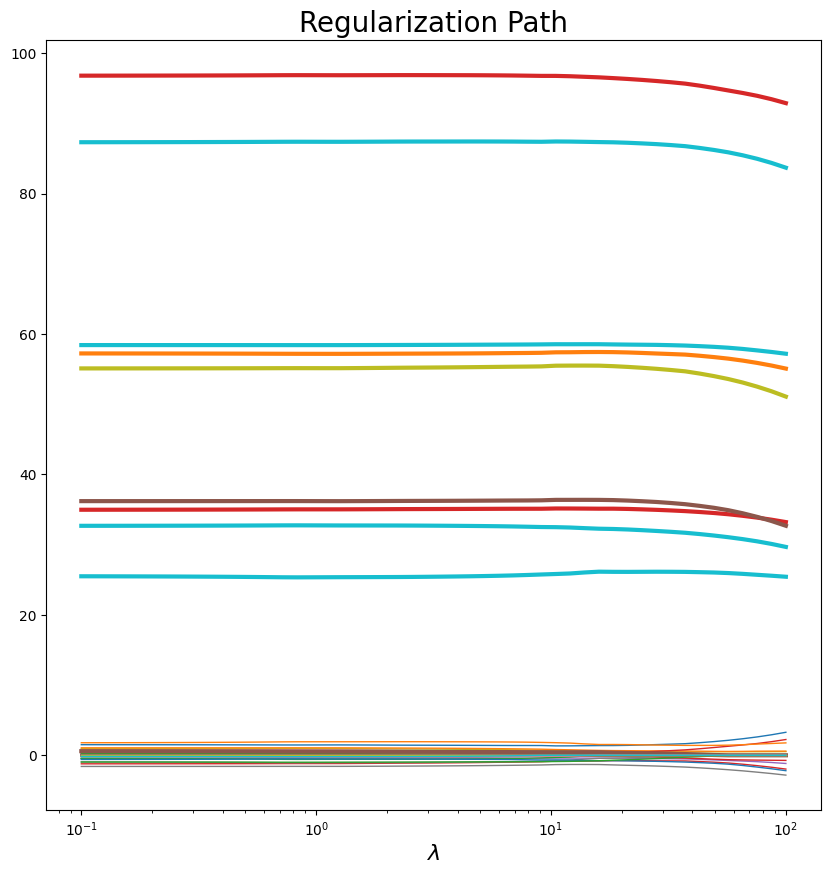

In [ ]:
plot_regularization_path(lambda_values, w_values, df[np.abs(df.w)>0].index.values)

In [ ]:
lambda_values

array([  0.1       ,   0.11513954,   0.13257114,   0.1526418 ,
         0.17575106,   0.20235896,   0.23299518,   0.26826958,
         0.30888436,   0.35564803,   0.40949151,   0.47148664,
         0.54286754,   0.62505519,   0.71968567,   0.82864277,
         0.95409548,   1.09854114,   1.26485522,   1.45634848,
         1.67683294,   1.93069773,   2.22299648,   2.55954792,
         2.9470517 ,   3.39322177,   3.90693994,   4.49843267,
         5.17947468,   5.96362332,   6.86648845,   7.90604321,
         9.10298178,  10.48113134,  12.06792641,  13.89495494,
        15.9985872 ,  18.42069969,  21.20950888,  24.42053095,
        28.11768698,  32.37457543,  37.2759372 ,  42.9193426 ,
        49.41713361,  56.89866029,  65.51285569,  75.43120063,
        86.85113738, 100.        ])

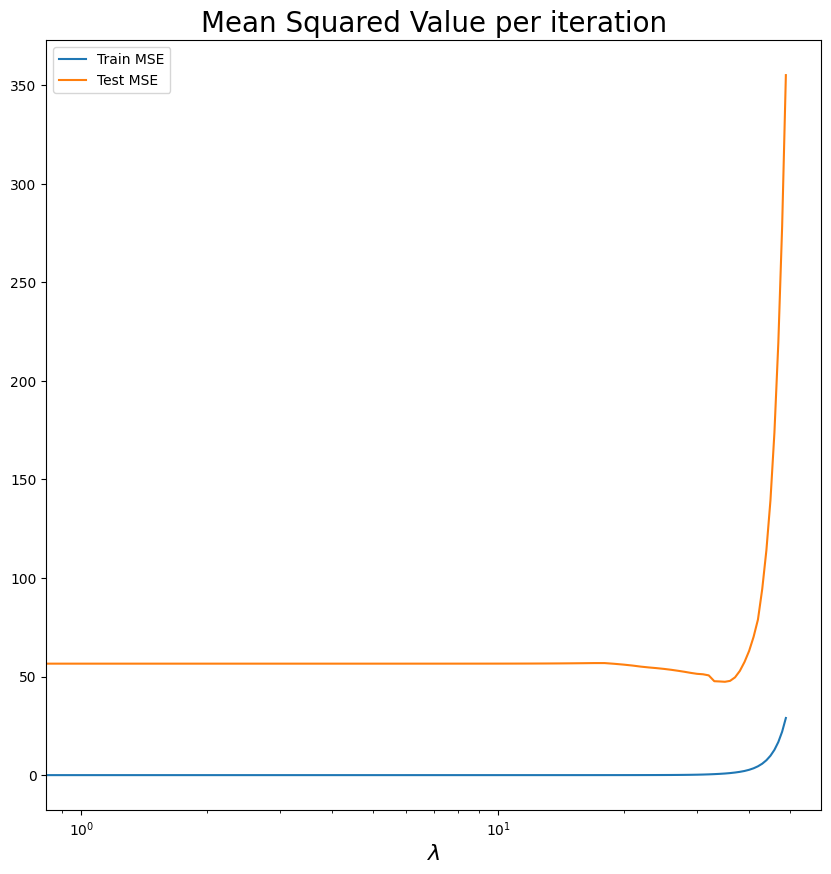

In [ ]:
plot_mse(train_mse_values_lag, test_mse_values_lag)

### Solution (Lasso with constrained formulation)

In [ ]:
X_lasso = Parameter(shape=X_train.shape, name="X")
y_lasso = Parameter(shape=y_train.shape, name="y")
s_lasso = Parameter(nonneg=True, name="s")
w_lasso = Variable(shape=(p_total, 1), name="w_lasso")

X_lasso.value, y_lasso.value = X_train, y_train

Lasso = Problem(
    Minimize(
        sum_squares(y_lasso - X_lasso@w_lasso)
    ),
    [norm1(w_lasso) <= s_lasso]
)

In [ ]:
s_values = np.logspace(-1, 3, 200)
w_values, train_mse_values, test_mse_values = [], [], []

for s in s_values:
    s_lasso.value = s
    Lasso.solve()
    w_values.append(w_lasso.value)
    train_mse_values.append(mse(X=X_train, y=y_train, beta=w_lasso.value))
    test_mse_values.append(mse(X=X_test, y=y_test, beta=w_lasso.value))

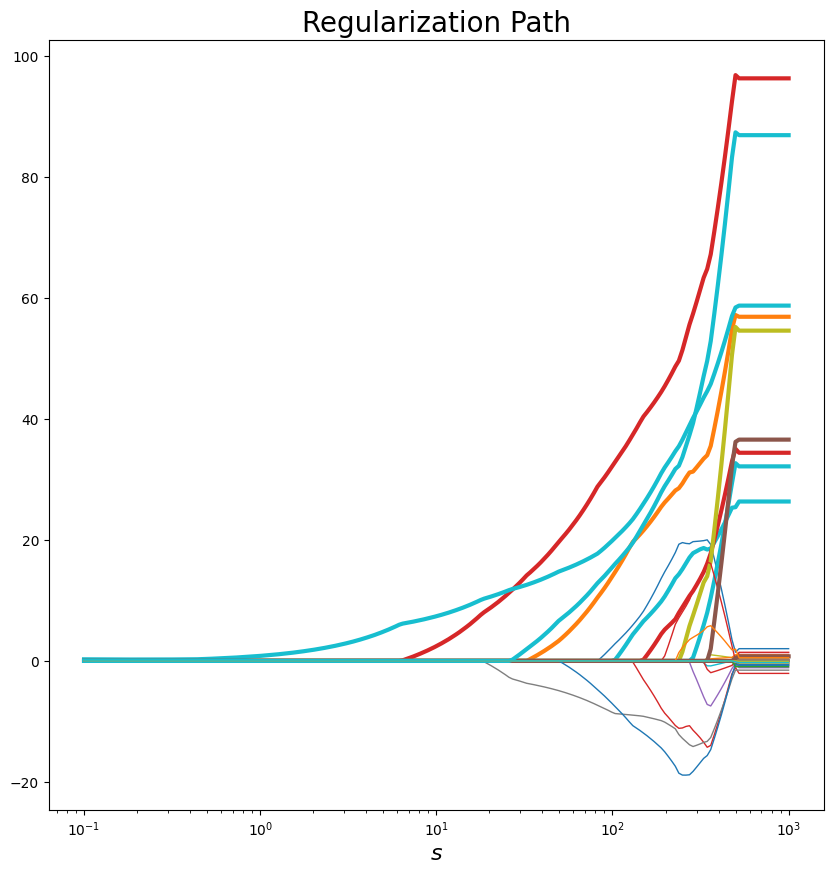

In [ ]:
plot_regularization_path(s_values, w_values, df[np.abs(df.w)>0].index.values, legend="s")

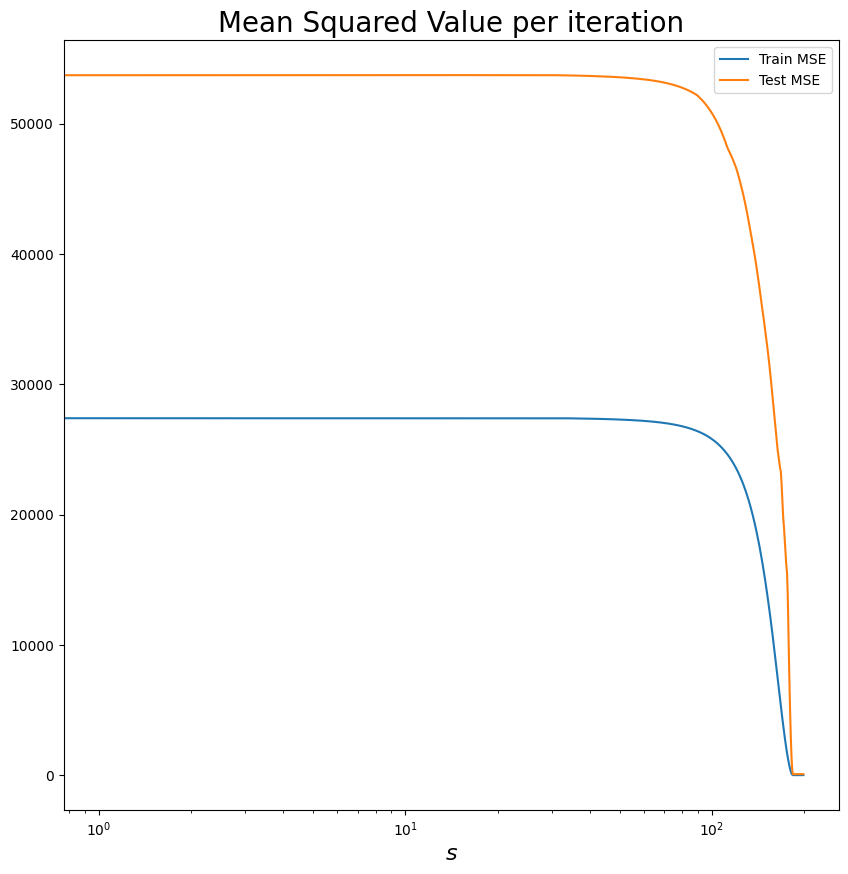

In [ ]:
plot_mse(train_mse_values, test_mse_values, legend="s")

### **Selección de modelo:** Eligiendo las mejores lambda y s

Para nuestro esquema de selección de modelo, debemos elegir la lambda, s que minimice el error cuadrático medio en el conjunto de prueba.


In [ ]:
s_values[np.argmin(test_mse_values)]

499.450511585514

In [ ]:
lambda_values[np.argmin(test_mse_values_lag)]

13.894954943731374

## Resumen de resultados

In [ ]:
df[np.abs(df.w)>0].index.values

array([19, 21, 23, 29, 33, 48, 59, 65, 75, 79])

In [ ]:
df.head(20)

,w,OLS,Constrained,Lagrangian
0,0.0,3.9294838821971894,7.95995528711988e-06,0.07867077883679029
1,0.0,5.889413081539131,3.0537798060713576e-06,0.0624234323648013
2,0.0,-26.045169243014566,-1.282998482939311e-05,1.2555561326594936e-20
3,0.0,-10.673939019622233,-4.5968229882094525e-05,1.7551389601218054e-20
4,0.0,-2.8673253654092807,-3.861927665245822e-06,3.080455159479548e-20
5,0.0,-20.54033881927282,-4.054337357283422e-06,-1.5286153248773428e-20
6,0.0,10.524865217399817,3.874090036884144e-06,3.431325693888233e-20
7,0.0,18.439708715668175,4.191689310136686e-06,-2.5013015165473396e-20
8,0.0,-5.159176292532276,-3.0439777958382878e-06,1.3264509758520135e-20
9,0.0,-0.8635817193402358,4.687750763150862e-06,1.943226118192214e-20


# Frameworks en producción (Real World)

Aunque cvx es extremadamente útil, cuando buscamos modelos con regularización (usando Python) tendemos a usar otros frameworks.

Aquí, además del framework del curso [Scikit-Learn](https://scikit-learn.org/s)existen otros paquetes como [GLMnet] de Stanford (https://web.stanford.edu/~hastie/glmnet_python/), [Tensorflow] de Google (https://www.tensorflow.org/) y [PyTorch] de Facebook (https ://pytorch.org/).

## Usando Scikit-Learn

Existen muchos métodos que podemos utilizar pero [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) es el más usado en producción porque estamos haciendo al mismo tiempo selección de modelos y consiguiendo el modelo óptimo en base a ciertos parámetros.

### Import library

In [ ]:
from sklearn.linear_model import LassoCV

#### Attributes

1. **alpha** (float): The amount of penalization chosen by cross validation
1. **coef** (ndarray of shape (n_features,) or (ntargets, n_features))
parameter vector (w in the cost function formula)
1. **intercept** (float or ndarray of shape (ntargets,):
independent term in decision function.
1. **mse_path** ndarray of shape (n_alphas, n_folds): mean square error for the test set on each fold, varying alpha
1. **alphas** (ndarray of shape (n_alphas,): The grid of alphas used for fitting
1. **dual_gap** (float or ndarray of shape (ntargets,)) The dual gap at the end of the optimization for the optimal alpha (alpha_).
1. **n_iter** (int number of iterations): run by the coordinate descent solver to reach the specified tolerance for the optimal alpha.

#### Methods

1. fit(X, y): Fit linear model with coordinate descent
1. get_params([deep]): Get parameters for this estimator.
1. path(X, y, *[, eps, n_alphas, alphas, …]): Compute Lasso path with coordinate descent
1. predict(X): Predict using the linear model.
1. score(X, y[, sample_weight]): Return the coefficient of determination R^2 of the prediction.
1. set_params(**params): Set the parameters of this estimator.

### Model selection via k-fold cross validation

In [ ]:
model = LassoCV(cv=7, random_state=1232300).fit(X, y.reshape(n))

In [ ]:
from sklearn.linear_model import enet_path, lasso_path

In [ ]:
eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

Computing regularization path using the lasso...


In [ ]:
coefs_lasso.shape

(1, 100, 100)

b [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(-5.235093010806908,
 122.80533828144249,
 -5.148408483834903,
 102.27550132897926)

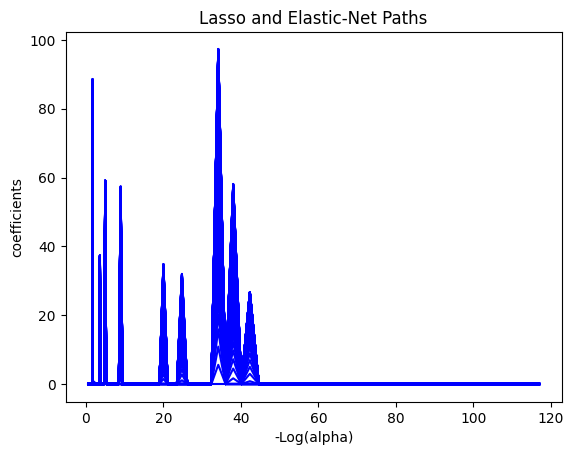

In [ ]:
from itertools import cycle
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = alphas_lasso
for coef_l, c in zip(coefs_lasso, colors):
  print(c, coef_l)
  l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.axis("tight")

In [ ]:
 coefs_lasso.shape

(1, 100, 100)

# New Section

In [ ]:
alphas_lasso

array([116.98531868, 110.88904295, 105.11045305,  99.6329939 ,
        94.44097315,  89.51951618,  84.85452351,  80.43263042,
        76.24116864,  72.26813005,  68.50213229,  64.93238618,
        61.54866475,  58.34127398,  55.30102503,  52.41920789,
        49.68756645,  47.09827483,  44.64391497,  42.31745539,
        40.11223102,  38.02192411,  36.04054614,  34.16242067,
        32.38216706,  30.69468506,  29.09514022,  27.57894999,
        26.14177064,  24.77948482,  23.48818969,  22.26418584,
        21.10396661,  20.00420811,  18.96175962,  17.97363465,
        17.03700231,  16.14917925,  15.30762194,  14.50991942,
        13.75378633,  13.03705645,  12.35767641,  11.71369985,
        11.10328185,  10.52467363,   9.97621752,   9.45634226,
         8.96355846,   8.49645435,   8.05369171,   7.63400208,
         7.23618308,   6.85909502,   6.50165757,   6.1628467 ,
         5.84169176,   5.53727268,   5.24871731,   4.97519899,
         4.71593411,   4.4701799 ,   4.2372323 ,   4.01

In [ ]:
best = model.coef_

### Agregando columna al data frame de soluciones

In [ ]:
df = pd.DataFrame.from_dict(
    {
        "w": w.reshape(m),
        "OLS": coef_ols.reshape(m),
        "Constrained": coef_lasso.reshape(m),
        "Lagrangian": coef_lasso_lag.reshape(m),
        "LassoCV": best
    }
)

In [ ]:
df[np.abs(df.w)>0]

,w,OLS,Constrained,Lagrangian,LassoCV
19,26.79571437692997,10.613187251165535,1.6423880340491963e-05,26.70365724383208,26.787188100892624
21,58.67947690864924,44.92352862709617,4.1489004152348326,58.57441987443998,58.49817705665139
23,97.83431853646809,61.49454785217981,55.129045875649396,97.76220328661873,97.784215064098
29,33.02340993896776,22.61834243976383,3.2430295772288494e-06,32.74304109457136,32.68080495115607
33,35.8839221732842,15.842341333054673,1.5255369935423097e-05,35.51292548126903,35.471625701064646
48,58.01220830471275,34.10976978845665,1.4464192149246933,57.80391161426959,57.80702788245752
59,59.56291123952296,32.27312300387868,23.41657727934535,59.478421150185135,59.47487127655933
65,38.15924099685708,26.10672638162152,1.8636527432986245e-05,37.833536027361674,37.79070788789274
75,0.9260389671008395,-1.6937118794019477,2.1917397086653213e-06,1.0184959689381567,0.9316665243873982
79,89.48445234796701,59.57671177507784,23.16049748562707,89.21607703653586,89.24750532684156


### Comparando los valores de los coeficientes

In [ ]:
def plot_coefficients(plot_info, w=20, h=10):
    """[summary]
    Args:
        plot_info ([type]): [description]
    """
    plt.figure(figsize=(w, h))
    for label, value in plot_info.items():
        plt.scatter(
            range(len(value["w"])),
            value["w"],
            label=label,
            c=value["color"],
            s=value["size"]
        )
    plt.text(0.0, -1.5, r"$\lambda={:3}$".format(Lambda))
    plt.title("Value of coefficients per solution")
    plt.ylabel("value")
    plt.xlabel(r"Coefficient $i$")
    plt.legend()
    plt.show()

In [ ]:
cmaps = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
to_plot = {
    k: {
        "color": cmaps[i%len(cmaps)], "size": 4 + i*4, "w": w.values
    } for i, (k, w) in enumerate(df.items())
}

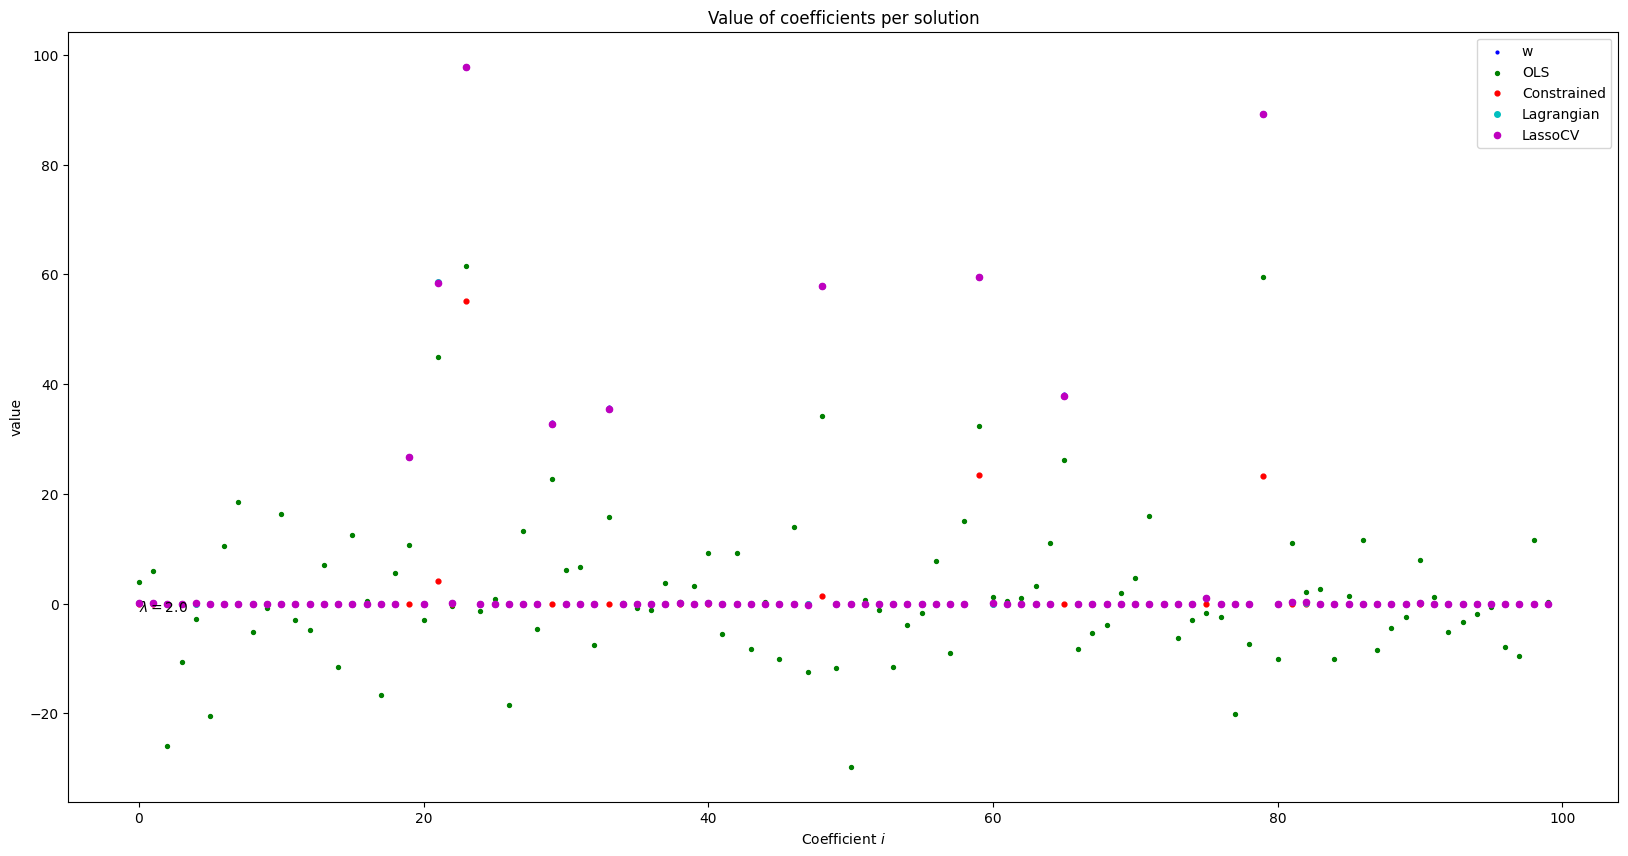

In [ ]:
plot_coefficients(plot_info=to_plot)

### Regularization path per each fold

We see the [path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV.path) method available in the documentation:

In [ ]:
alphas, coefs, dual_gaps = LassoCV.path(X, y, eps=1e-5, n_alphas=150)

In [ ]:
alphas

array([116.98531868, 108.28649966, 100.23450927,  92.78125048,
        85.88220268,  79.49615572,  73.5849638 ,  68.11331753,
        63.0485331 ,  58.36035697,  54.02078523,  50.00389628,
        46.28569601,  42.84397446,  39.65817316,  36.70926235,
        33.97962728,  31.45296298,  29.11417692,  26.94929881,
        24.94539716,  23.09050206,  21.37353363,  19.78423591,
        18.31311552,  16.95138501,  15.69091035,  14.52416232,
        13.4441716 ,  12.44448705,  11.51913725,  10.66259482,
         9.86974334,   9.13584688,   8.45652165,   7.82770983,
         7.24565533,   6.70688136,   6.20816966,   5.74654127,
         5.31923874,   4.92370967,   4.55759142,   4.21869708,
         3.90500231,   3.61463333,   3.34585566,   3.09706382,
         2.86677169,   2.65360368,   2.45628646,   2.27364139,
         2.10457748,   1.94808487,   1.80322876,   1.6691439 ,
         1.54502934,   1.43014372,   1.3238008 ,   1.22536534,
         1.13424936,   1.04990861,   0.97183928,   0.89

In [ ]:
coefs[0].T

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.10665776, -1.0515856 , ...,  0.        ,
        -0.11898679, -1.45646962],
       [ 0.        ,  0.106659  , -1.0515931 , ...,  0.        ,
        -0.1189919 , -1.45647216],
       [ 0.        ,  0.10666014, -1.05160005, ...,  0.        ,
        -0.11899663, -1.4564745 ]])

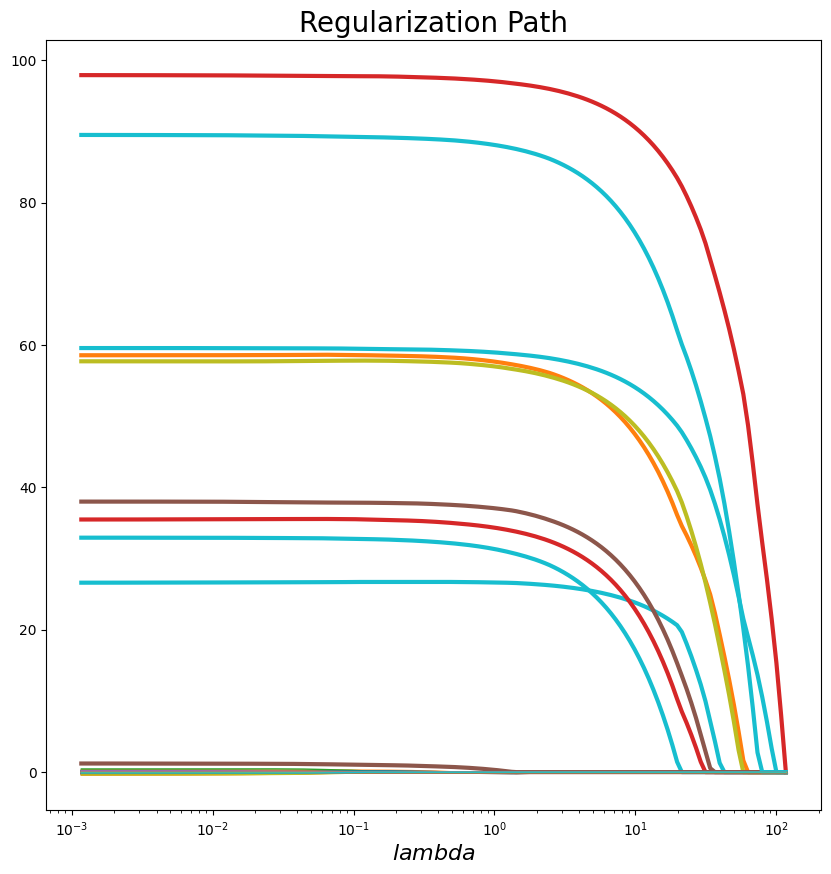

In [ ]:
plot_regularization_path(alphas.reshape((150, 1)), coefs[0].T, df[np.abs(df.w)>0].index.values, legend="lambda")

In [ ]:
-np.log(alphas.reshape((150, 1)))

array([[-3.75354428],
       [-3.67627632],
       [-3.59900837],
       [-3.52174041],
       [-3.44447245],
       [-3.3672045 ],
       [-3.28993654],
       [-3.21266859],
       [-3.13540063],
       [-3.05813267],
       [-2.98086472],
       [-2.90359676],
       [-2.82632881],
       [-2.74906085],
       [-2.67179289],
       [-2.59452494],
       [-2.51725698],
       [-2.43998902],
       [-2.36272107],
       [-2.28545311],
       [-2.20818516],
       [-2.1309172 ],
       [-2.05364924],
       [-1.97638129],
       [-1.89911333],
       [-1.82184538],
       [-1.74457742],
       [-1.66730946],
       [-1.59004151],
       [-1.51277355],
       [-1.43550559],
       [-1.35823764],
       [-1.28096968],
       [-1.20370173],
       [-1.12643377],
       [-1.04916581],
       [-0.97189786],
       [-0.8946299 ],
       [-0.81736195],
       [-0.74009399],
       [-0.66282603],
       [-0.58555808],
       [-0.50829012],
       [-0.43102217],
       [-0.35375421],
       [-0

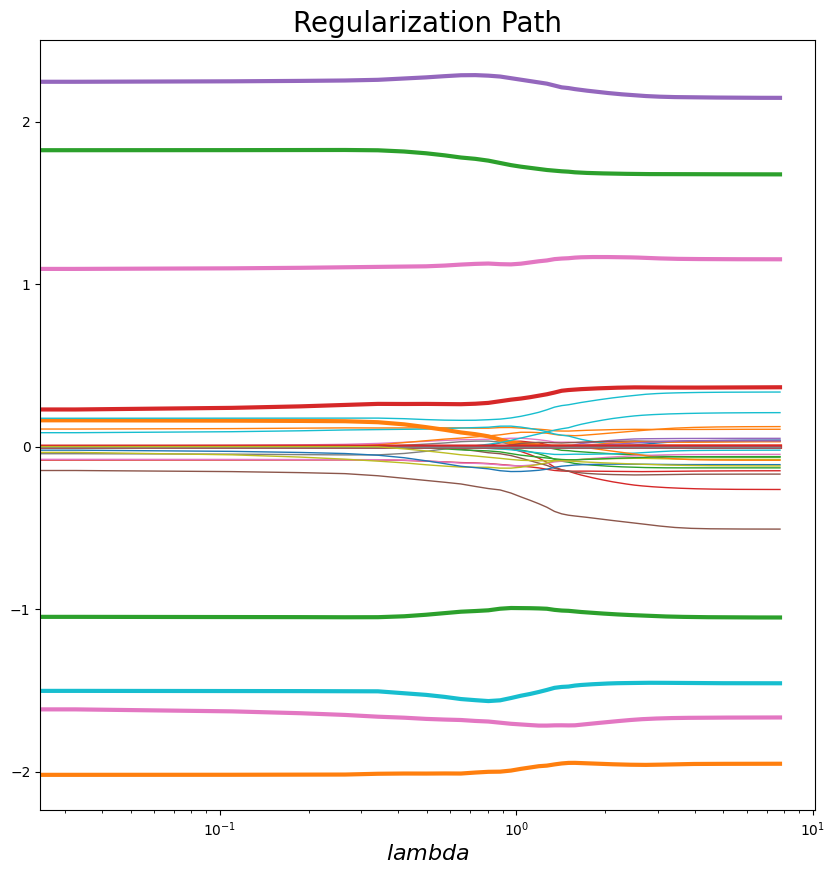

In [ ]:
plot_regularization_path(-np.log(alphas.reshape((150, 1))), coefs[0].T, df[np.abs(df.w)>0].index.values, legend="lambda")

# Referencias

- [1] [LASSO: Regression Shrinkage and Selection via the Lasso](https://www.jstor.org/stable/2346178)
- [2] [CVX](http://cvxr.com/cvx/) CVX: Matlab Software for Disciplined Convex Programming
- [3] [cvxpy](https://github.com/cvxpy/cvxpy) Convex optimization, for everyone.
- [4] [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)  Validación cruzada con LASSO. (_Cross-Validation with Lasso_)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


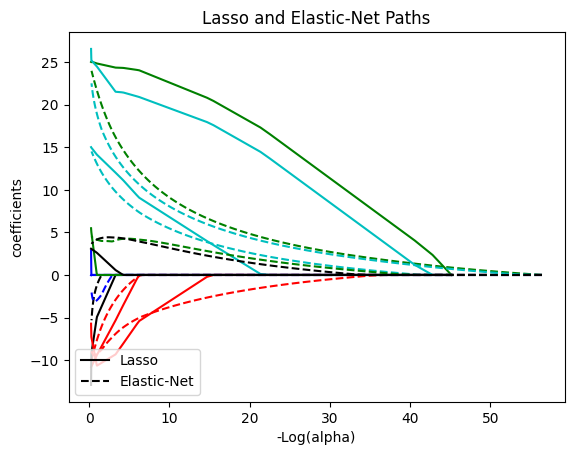

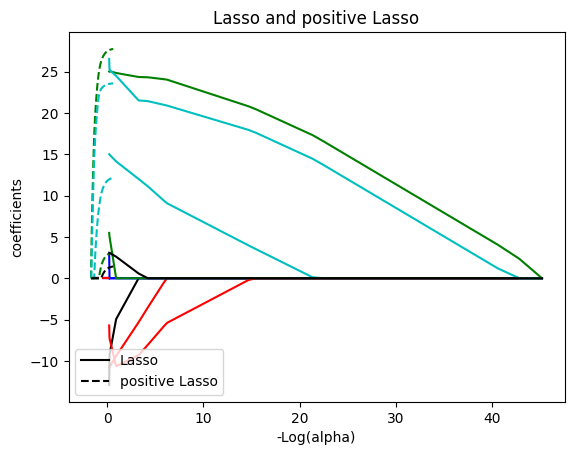

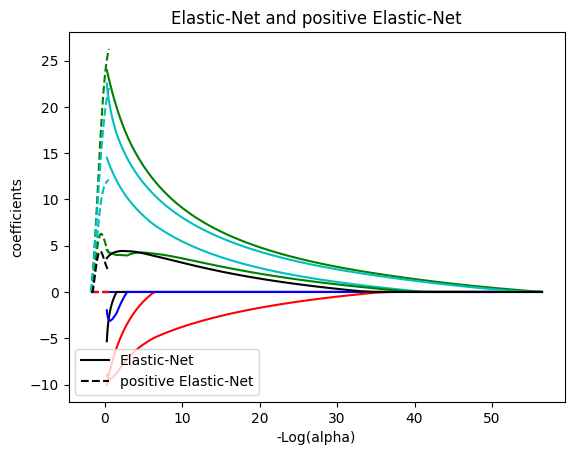

In [ ]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import enet_path, lasso_path

X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

# Display results

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = alphas_lasso
neg_log_alphas_enet = alphas_enet
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()